In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df_original = nc.Dataset('/Users/changyichieh/Documents/Hot Jupiter/Hough_coeff_200001010000000_original.nc')
df_Temperature0 = nc.Dataset('/Users/changyichieh/Documents/Hot Jupiter/Hough_coeff_200001010000000_T0.nc')

In [6]:
print(df_original.variables.keys())
print(df_Temperature0.variables.keys())

dict_keys(['n', 'm', 'k', 'time', 'EIG', 'WIG', 'BAL'])
dict_keys(['n', 'm', 'k', 'time', 'EIG', 'WIG', 'BAL'])


In [2]:
df_original.variables

{'n': <class 'netCDF4._netCDF4.Variable'>
 float64 n(n)
     long_name: meridional mode index
     units: ~
 unlimited dimensions: 
 current shape = (30,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'm': <class 'netCDF4._netCDF4.Variable'>
 float64 m(m)
     long_name: vertical mode index
     units: ~
 unlimited dimensions: 
 current shape = (20,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'k': <class 'netCDF4._netCDF4.Variable'>
 float64 k(k)
     long_name: zonal wavenumber
     units: ~
 unlimited dimensions: 
 current shape = (41,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: time
     units: hours since 2000-01-01 00:00:00
     calendar: standard
 unlimited dimensions: time
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'EIG': <class 'netCDF4._netCDF4.Variable'>
 float64 EIG(time, Re+Im, k, m, n)
     lo

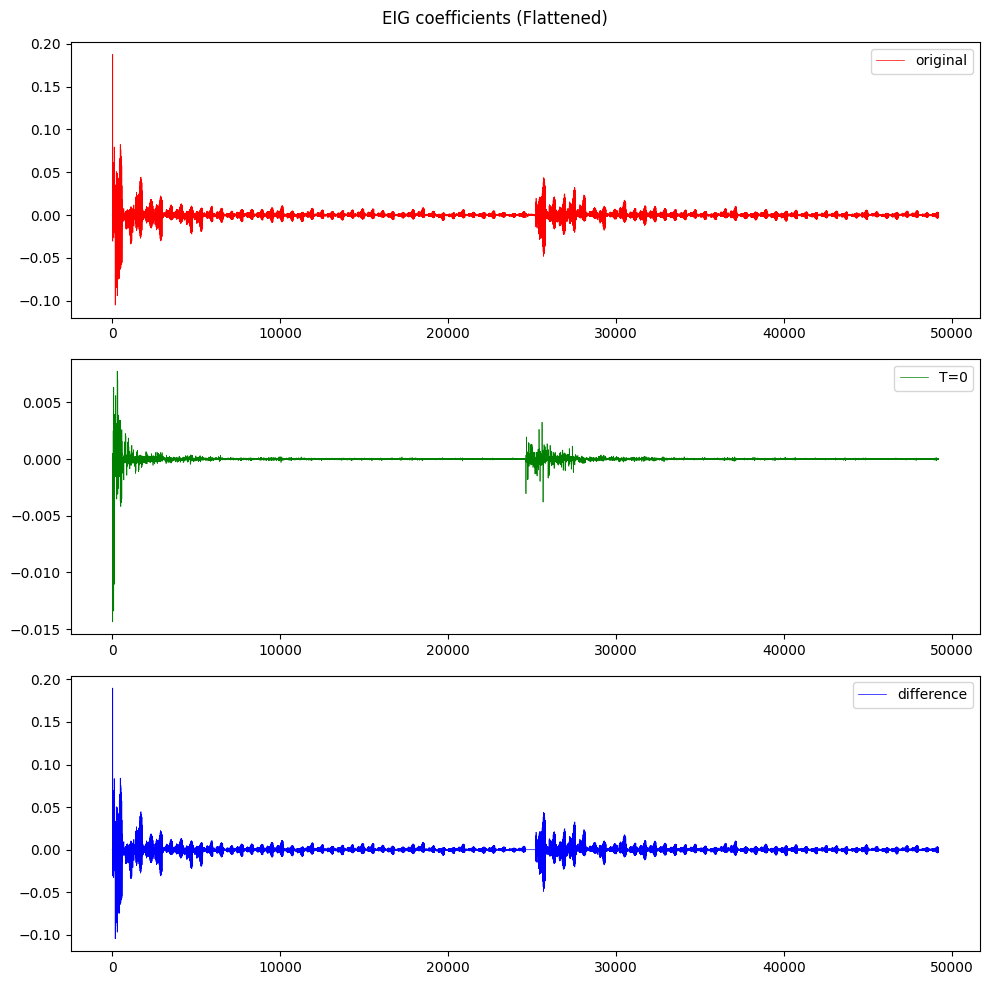

In [24]:
# compare the difference between the original and the T0 of 'EIG'

originalEIGCoeff = df_original.variables['EIG'][0][:]
T0EIGCoeff = df_Temperature0.variables['EIG'][0][:]
differenceEIGCoeff = originalEIGCoeff - T0EIGCoeff

# flatten the array to 1D
originalEIGCoeff = originalEIGCoeff.flatten()
T0EIGCoeff = T0EIGCoeff.flatten()
differenceEIGCoeff = differenceEIGCoeff.flatten()

# plot three figures in one plot, aligned vertically, with the same x-axis. Use the color to distinguish the values.
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(originalEIGCoeff, 'r', label='original', linewidth=0.5)
plt.legend(loc='upper right')
plt.subplot(3, 1, 2)
plt.plot(T0EIGCoeff, 'g', label='T=0', linewidth=0.5)
plt.legend(loc='upper right')
plt.subplot(3, 1, 3)
plt.plot(differenceEIGCoeff, 'b', label='difference', linewidth=0.5)
plt.legend(loc='upper right')
plt.suptitle('EIG coefficients (Flattened)')
plt.tight_layout()
plt.savefig('EIG_coefficients.png')
plt.show()


